# Import

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

# Data

In [204]:
n_sample=20
x_c1=np.ones((n_sample,2),dtype=float)
x_c2=np.ones((n_sample,2),dtype=float)

f1 = open('x_c1.txt')
lines = f1.readlines()
c1_row=0
for line in lines:
    list=line.strip('').split(',')
    x_c1[c1_row:]=list[0:2]
    c1_row+=1

f2 = open('x_c2.txt')
lines = f2.readlines()
c2_row=0
for line in lines:
    list=line.strip('').split(',')
    x_c2[c2_row:]=list[0:2]
    c2_row+=1

#add bias term
bias1=np.ones((n_sample,1),dtype=float)
bias2=np.ones((n_sample,1),dtype=float)
x_c1=np.hstack([bias1,x_c1])
x_c2=np.hstack([bias2,x_c2])

#label
y1=np.ones((n_sample,1),dtype=float)*-1
y2=np.ones((n_sample,1),dtype=float)

x=np.vstack([x_c1,x_c2])
y=np.vstack([y1,y2])

w=np.random.rand(1,3)

def drawData(x_c1,x_c2):
    plt.axis([-5,12,-5,10])
    for i in range(0,20):
        plt.scatter(x_c1[i][1],x_c1[i][2],c='b',marker='+')
        plt.scatter(x_c2[i][1],x_c2[i][2],c='w',edgecolor='r',marker='o')
        
def drawLine(w):
    dot1=[]
    dot2=[]
    x1=-5
    y1=-w[0][0]/w[0][2]-w[0][1]/w[0][2]*x1
    x2=10
    y2=-w[0][0]/w[0][2]-w[0][1]/w[0][2]*x2
    dot1.append(x1)
    dot1.append(x2)
    dot2.append(y1)
    dot2.append(y2)
    plt.plot(dot1,dot2,c='k')
    
def drawDataHyperplane(x_c1,x_c2,w):
    drawData(x_c1,x_c2)
    drawLine(w)

# Practice1

In [205]:
def perceptron_mis_yx(y, x, w, n_epoch, eta):
    n_sample=np.size(y,1)/2
    x1=np.split(x,2,axis=0)
    x_c1=x1[0]
    x_c2=x1[1]
    yx=np.tile(y,(1,3))*x
    
    print('----- Perceptron_mis_yx() started -----\n')
    for k in range(1,n_epoch+1):
        wyx=np.ones((40,1),dtype=float)
        err_sum=0
        for i in range(0,40):
            err=yx[i][0]*w[0][0]+yx[i][1]*w[0][1]+yx[i][2]*w[0][2]
            wyx[i]=wyx[i]*err
            if err<0:
                err_sum=err_sum+1
        print('err=',err_sum)
        wyx=np.hstack([yx,wyx])
        yx_misclassified=np.delete(wyx,np.where(wyx[:,3]>0),axis=0)
        yx_misclassified=np.delete(yx_misclassified,3,axis=1)
        w=w+np.sum(yx_misclassified, axis=0)
        drawDataHyperplane(x_c1,x_c2,w)
        
        if err_sum==0:
            break
        
def perceptron_l2(y,x,w,n_epoch,eta):
    n_sample=np.size(y,1)/2
    x1=np.split(x,2,axis=0)
    x_c1=x1[0]
    x_c2=x1[1]
    
    print('----- Perceptron_l2() started -----\n')
    for k in range(1,n_epoch+1):
        wx=np.ones((40,1),dtype=float)
        err2=0
        for i in range(0,40):
            err=x[i][0]*w[0][0]+x[i][1]*w[0][1]+x[i][2]*w[0][2]
            wx[i]=wx[i]*err
            if i<20:
                if err>0:
                    err2=err2+1
            else:
                if err<0:
                    err2=err2+1
        diff=np.tile((y-wx),(1,3))*x
        w=w+eta*np.sum(diff,axis=0)
        z=(y-wx)*(y-wx)
        err1=1/2*np.sum(z)
        print('err(',k,')=',err1, err2)
        drawDataHyperplane(x_c1,x_c2,w)
        
        if err2==0:
            break

----- Perceptron_mis_yx() started -----

err= 13
err= 26
err= 12
err= 11
err= 10
err= 9
err= 3
err= 2
err= 1
err= 0


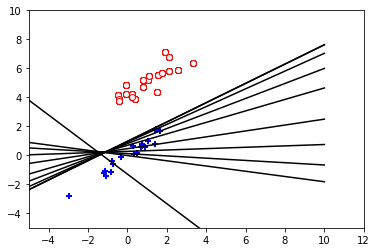

In [206]:
n_epoch=300
eta=0.001
perceptron_mis_yx(y,x,w,n_epoch,eta)

----- Perceptron_l2() started -----

err( 1 )= 311.07372069122084 13
err( 2 )= 70.89573889770176 13
err( 3 )= 34.77989467636482 13
err( 4 )= 28.580220921867294 14
err( 5 )= 26.797647663027846 16
err( 6 )= 25.697148987501755 16
err( 7 )= 24.730332612568496 16
err( 8 )= 23.81544587168066 16
err( 9 )= 22.939127213413904 16
err( 10 )= 22.098093591997323 16
err( 11 )= 21.29059937268851 14
err( 12 )= 20.515182658846836 13
err( 13 )= 19.77047877064922 12
err( 14 )= 19.05519013177654 12
err( 15 )= 18.3680792091733 12
err( 16 )= 17.707964972031075 12
err( 17 )= 17.07372000165776 12
err( 18 )= 16.46426782445672 12
err( 19 )= 15.878580398042086 12
err( 20 )= 15.315675733344609 12
err( 21 )= 14.774615643710487 12
err( 22 )= 14.254503613577029 12
err( 23 )= 13.754482779904468 12
err( 24 )= 13.273734019972313 12
err( 25 )= 12.811474139532146 12
err( 26 )= 12.366954155665958 12
err( 27 )= 11.939457669034029 11
err( 28 )= 11.528299320510705 11
err( 29 )= 11.132823327501386 10
err( 30 )= 10.75240209551

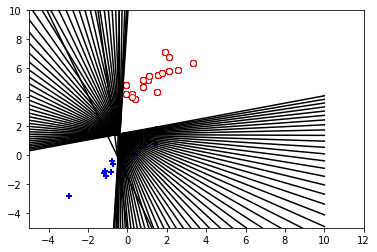

In [207]:
n_epoch=300
eta=0.001
perceptron_l2(y,x,w,n_epoch,eta)

# Practice2

In [211]:
def svm(y,x,w,n_epoch,eta,lamda):
    n_sample=np.size(y,1)/2
    x1=np.split(x,2,axis=0)
    x_c1=x1[0]
    x_c2=x1[1]
    yx=np.tile(y,(1,3))*x
    
    for k in range(1,n_epoch+1):
        wyx=np.ones((40,1),dtype=float)
        err1=0
        err2=0
        z1=0
        z2=0
        z3=0
        for i in range(0,40):
            err=yx[i][0]*w[0][0]+yx[i][1]*w[0][1]+yx[i][2]*w[0][2]
            wyx[i]=wyx[i]*err
            if wyx[i]<1:
                z1=z1+yx[i][0]
                z2=z2+yx[i][1]
                z3=z3+yx[i][2]
                err1=err1+1
                err2=err2+err
        z=[z1,z2,z3]
        w=w+eta*(-2*lamda*w*(n_sample*2)+z)
        w1=mt.sqrt(np.sum(w*w))
        w2=mt.sqrt((w[0][1]+w[0][2])*(w[0][1]+w[0][2]))
        print('err(',k,')=',err1, err2,'w=',w[0], ', lwl=',w1,', lw23l=',w2)
        drawDataHyperplane(x_c1,x_c2,w)

err( 1 )= 15 -24.287128731437736 w= [0.51553669 0.92812801 0.80787898] , lwl= 1.334116987248424 , lw23l= 1.7360069916988767
err( 2 )= 15 -23.888111491642587 w= [0.50052638 0.91891362 0.79843052] , lwl= 1.3162143464078058 , lw23l= 1.7173441455590428
err( 3 )= 15 -23.489102232192245 w= [0.48551637 0.90969941 0.78898226] , lwl= 1.2983728956549399 , lw23l= 1.6986816726761318
err( 4 )= 15 -23.09010095292708 w= [0.47050666 0.90048539 0.77953418] , lwl= 1.2805951737977384 , lw23l= 1.6800195730426783
err( 5 )= 15 -22.691107653687506 w= [0.45549725 0.89127155 0.7700863 ] , lwl= 1.2628838532043298 , lw23l= 1.6613578466512173
err( 6 )= 15 -22.29212233431392 w= [0.44048814 0.88205789 0.7606386 ] , lwl= 1.245241747939164 , lw23l= 1.6426964934942845
err( 7 )= 15 -21.89314499464672 w= [0.42547933 0.87284442 0.75119109] , lwl= 1.2276718224281802 , lw23l= 1.6240355135644147
err( 8 )= 15 -21.49417563452631 w= [0.41047082 0.86363114 0.74174377] , lwl= 1.2101772006851106 , lw23l= 1.6053749068541432
err( 9

err( 68 )= 18 2.87227719530241 w= [-0.44049876  0.29071408  0.37695804] , lwl= 0.6485762803873558 , lw23l= 0.6676721153558236
err( 69 )= 18 3.13245509940622 w= [-0.45248995  0.28019619  0.3793446 ] , lwl= 0.6535743154775556 , lw23l= 0.6595407959135166
err( 70 )= 18 3.3926277999519474 w= [-0.4644809   0.26967852  0.38173112] , lwl= 0.6589291728947996 , lw23l= 0.6514096390975983
err( 71 )= 18 3.6527952970436646 w= [-0.47647161  0.25916105  0.38411759] , lwl= 0.6646322045998277 , lw23l= 0.6432786449048163
err( 72 )= 18 3.9129575907854393 w= [-0.48846208  0.2486438   0.38650401] , lwl= 0.6706745053616852 , lw23l= 0.6351478133319183
err( 73 )= 17 3.1712741774884687 w= [-0.50145231  0.23861835  0.38471829] , lwl= 0.675574787084001 , lw23l= 0.6233366343756517
err( 74 )= 18 4.43011049884573 w= [-0.51344228  0.22810151  0.3871047 ] , lwl= 0.6822780343945972 , lw23l= 0.6152062016429641
err( 75 )= 18 4.690257246283469 w= [-0.52543201  0.21758487  0.38949106] , lwl= 0.6892933036834412 , lw23l= 0.6

err( 134 )= 11 9.118887207401912 w= [-1.09544063 -0.32099074  0.54453897] , lwl= 1.2647323467875617 , lw23l= 0.22354822598218377
err( 135 )= 10 8.182522567837069 w= [-1.10141872 -0.32703352  0.54391865] , lwl= 1.2711890535221613 , lw23l= 0.2168851250176641
err( 136 )= 11 9.251915589846458 w= [-1.10639669 -0.33284103  0.54729694] , lwl= 1.2784485614721877 , lw23l= 0.21445590731516379
err( 137 )= 10 8.31826292587465 w= [-1.11237456 -0.33888357  0.54667656] , lwl= 1.2849414403395596 , lw23l= 0.20779298819701747
err( 138 )= 9 7.366943247124001 w= [-1.11535231 -0.34329246  0.55129986] , lwl= 1.2906556584695914 , lw23l= 0.2080074023372535
err( 139 )= 8 6.408419972087977 w= [-1.11933001 -0.3479364   0.55192446] , lwl= 1.295600252929611 , lw23l= 0.2039880621892068
err( 140 )= 8 6.446325862841535 w= [-1.12330762 -0.35258025  0.55254905] , lwl= 1.3005549972199906 , lw23l= 0.19996880242796294
err( 141 )= 8 6.484230995477279 w= [-1.12728515 -0.35722401  0.55317363] , lwl= 1.3055197740437725 , lw23

err( 203 )= 3 2.4636629152962204 w= [-1.25579553 -0.52191498  0.63919413] , lwl= 1.5026599104990181 , lw23l= 0.1172791556184607
err( 204 )= 3 2.4670776057179147 w= [-1.25677042 -0.52326374  0.63996655] , lwl= 1.504271919748507 , lw23l= 0.11670281003534833
err( 205 )= 3 2.470492227845801 w= [-1.25774528 -0.52461247  0.64073895] , lwl= 1.5058844064828925 , lw23l= 0.1161264759791476
err( 206 )= 3 2.473906781681244 w= [-1.25872013 -0.52596118  0.64151134] , lwl= 1.507497369036627 , lw23l= 0.11555015344962805
err( 207 )= 3 2.4773212672256104 w= [-1.25969495 -0.52730986  0.64228371] , lwl= 1.5091108057508387 , lw23l= 0.11497384244655906
err( 208 )= 3 2.4807356844802655 w= [-1.26066976 -0.52865852  0.64305606] , lwl= 1.5107247149733016 , lw23l= 0.11439754296971016
err( 209 )= 3 2.4841500334465767 w= [-1.26164455 -0.53000714  0.6438284 ] , lwl= 1.5123390950584044 , lw23l= 0.11382125501885076
err( 210 )= 3 2.487564314125907 w= [-1.26261931 -0.53135574  0.64460072] , lwl= 1.5139539443671206 , lw

err( 270 )= 3 2.692296241350642 w= [-1.32106968 -0.6122224   0.69091187] , lwl= 1.6116452982667087 , lw23l= 0.07868947651121616
err( 271 )= 3 2.6957063591058144 w= [-1.32204326 -0.61356935  0.69168325] , lwl= 1.6132859143050522 , lw23l= 0.07811390272168584
err( 272 )= 3 2.6991164086586332 w= [-1.32301681 -0.61491628  0.69245462] , lwl= 1.6149269096447845 , lw23l= 0.07753834044363139
err( 273 )= 3 2.7025263900104597 w= [-1.32399035 -0.61626318  0.69322597] , lwl= 1.6165682830068624 , lw23l= 0.07696278967682246
err( 274 )= 3 2.7059363031626598 w= [-1.32496387 -0.61761006  0.69399731] , lwl= 1.6182100331171727 , lw23l= 0.0763872504210289
err( 275 )= 3 2.7093461481165964 w= [-1.32593737 -0.6189569   0.69476863] , lwl= 1.6198521587065093 , lw23l= 0.07581172267602054
err( 276 )= 3 2.7127559248736333 w= [-1.32691086 -0.62030373  0.69553993] , lwl= 1.621494658510553 , lw23l= 0.07523620644156703
err( 277 )= 3 2.7161656334351365 w= [-1.32788432 -0.62165052  0.69631122] , lwl= 1.623137531269847 ,

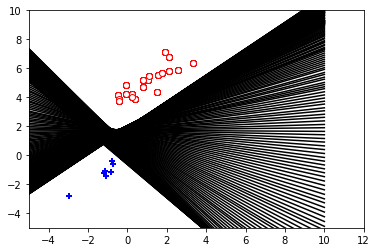

In [212]:
n_epoch=300
eta=0.001
lamda=0.01
svm(y,x,w,n_epoch,eta,lamda)